In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [15]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
df.isnull().sum

<bound method DataFrame.sum of      gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                 

Distribution os Math Scores

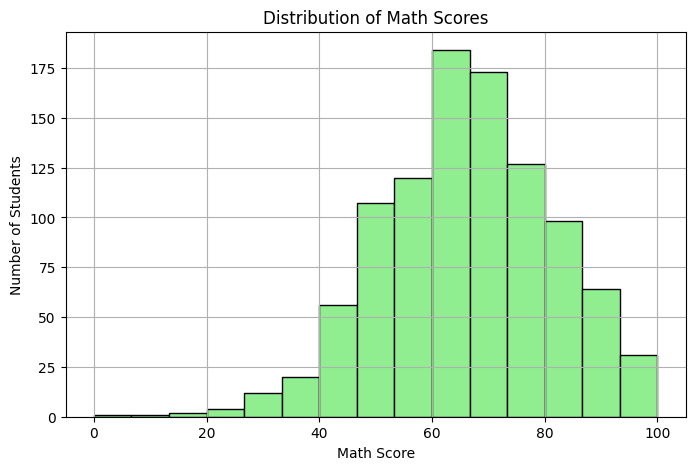

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['math score'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


Distribution of Reading Scores

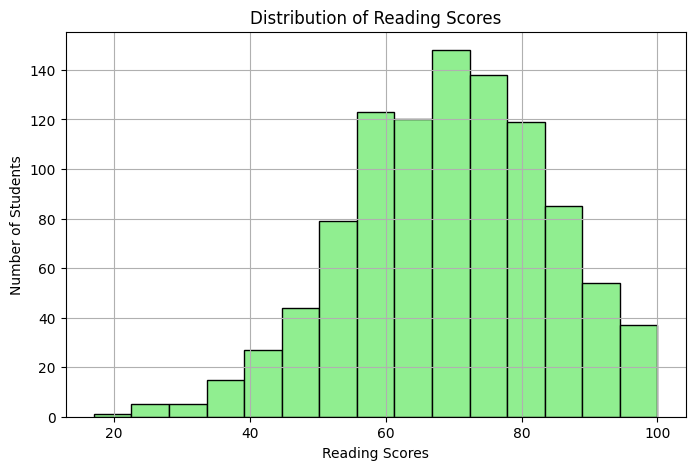

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df['reading score'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Scores')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


Distribution of Writing Scores

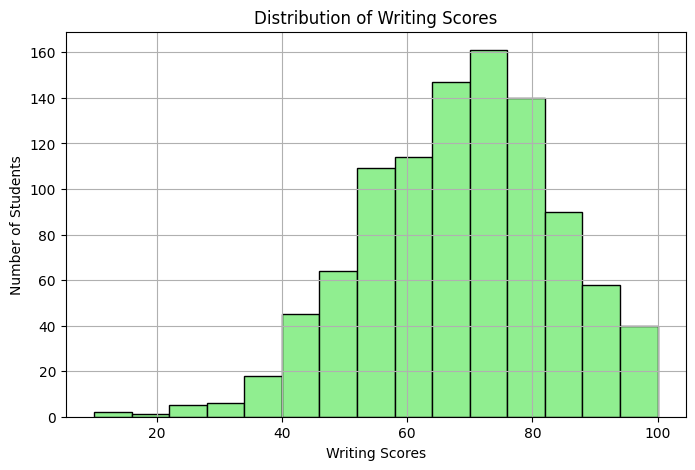

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df['writing score'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Scores')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

Average Scores by Gender

In [25]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


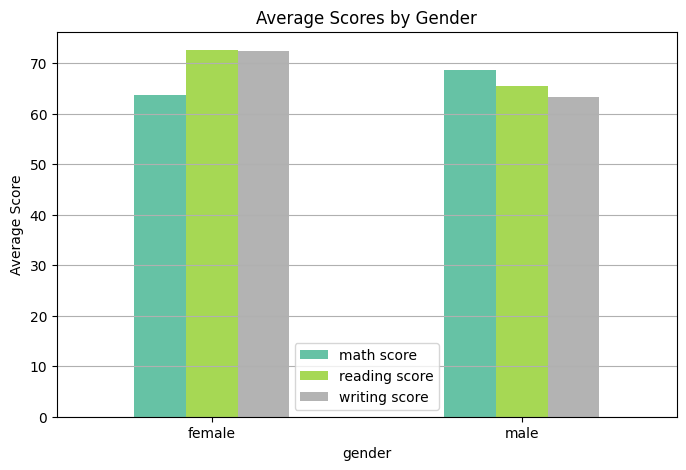

In [26]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().plot(
    kind='bar',
    figsize=(8,5),
    colormap='Set2',
    title="Average Scores by Gender"
)
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Analyzing performance based on the test preparation course

In [27]:
df['test preparation course'].value_counts()


test preparation course
none         642
completed    358
Name: count, dtype: int64

In [28]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


visualizing the difference

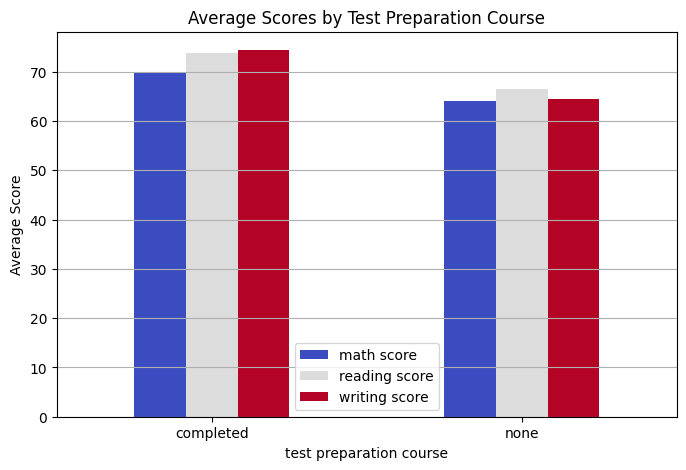

In [29]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().plot(
    kind='bar',
    figsize=(8, 5),
    colormap='coolwarm',
    title='Average Scores by Test Preparation Course'
)
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


adding a new coloum name average score

In [ ]:
import numpy as np

df['average score'] = np.mean(df[['math score', 'reading score', 'writing score']], axis=1)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [33]:
df.groupby('test preparation course')['average score'].mean()


test preparation course
completed    72.669460
none         65.038941
Name: average score, dtype: float64

 Adding Pass/Fail column 

In [35]:
df['result'] = df['average score'].apply(lambda x: 'Pass' if x >= 70 else 'Fail')
df['result'].value_counts()


result
Fail    541
Pass    459
Name: count, dtype: int64

Visualize Pass/Fail as a Bar Chart

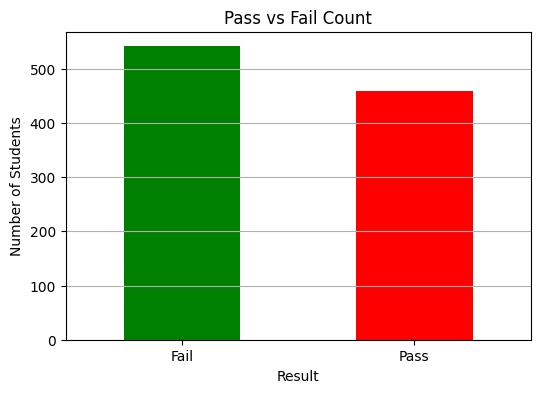

In [36]:
import matplotlib.pyplot as plt

df['result'].value_counts().plot(
    kind='bar',
    color=['green', 'red'],
    figsize=(6,4),
    title='Pass vs Fail Count'
)
plt.xlabel('Result')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Group by Gender and Result

In [37]:
gender_result = df.groupby(['gender', 'result']).size().unstack()
print(gender_result)


result  Fail  Pass
gender            
female   250   268
male     291   191


Visualize Pass/Fail Counts by Gender

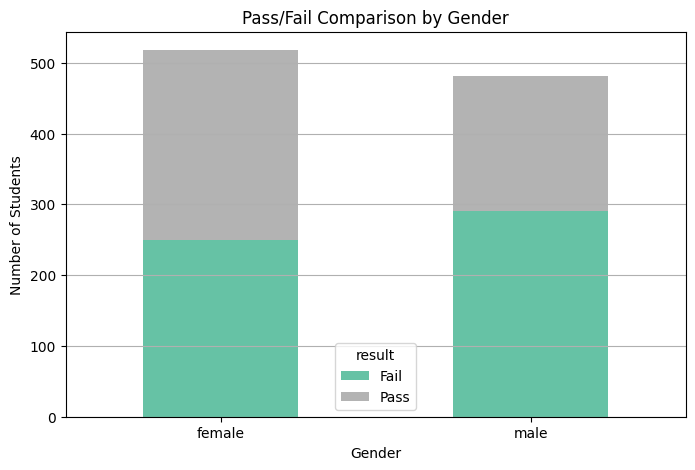

In [38]:
gender_result.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',
    figsize=(8,5),
    title='Pass/Fail Comparison by Gender'
)
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Group by parental level of education and result

In [39]:
parent_result = df.groupby(['parental level of education', 'result']).size().unstack()
print(parent_result)


result                       Fail  Pass
parental level of education            
associate's degree            112   110
bachelor's degree              52    66
high school                   131    65
master's degree                23    36
some college                  118   108
some high school              105    74


Visualize as Stacked Bar Chart

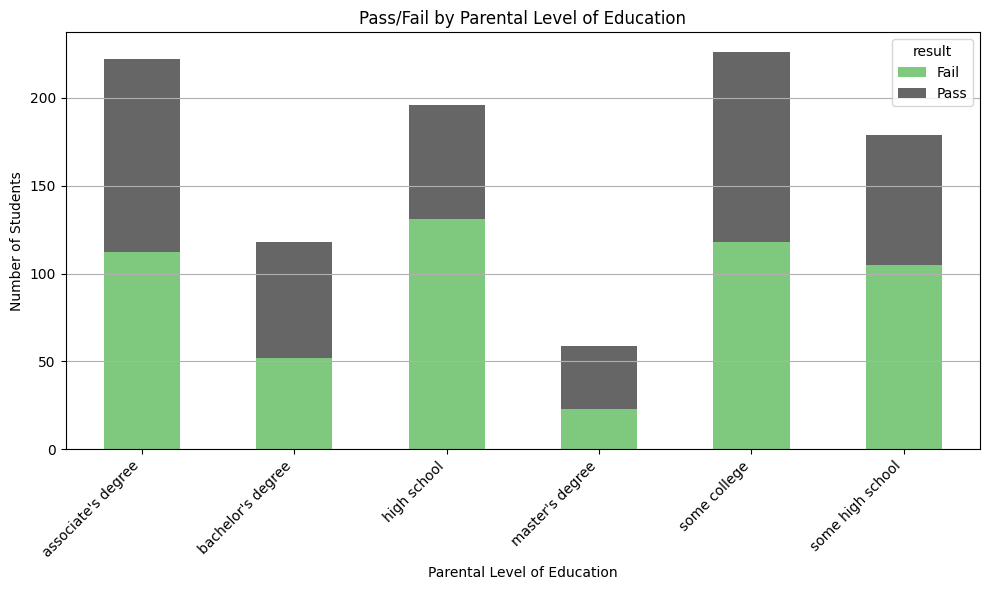

In [40]:
parent_result.plot(
    kind='bar',
    stacked=True,
    colormap='Accent',
    figsize=(10,6),
    title='Pass/Fail by Parental Level of Education'
)
plt.xlabel("Parental Level of Education")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Group by test preparation course and result

In [41]:
prep_result = df.groupby(['test preparation course', 'result']).size().unstack()
print(prep_result)


result                   Fail  Pass
test preparation course            
completed                 140   218
none                      401   241


Visualize the Results

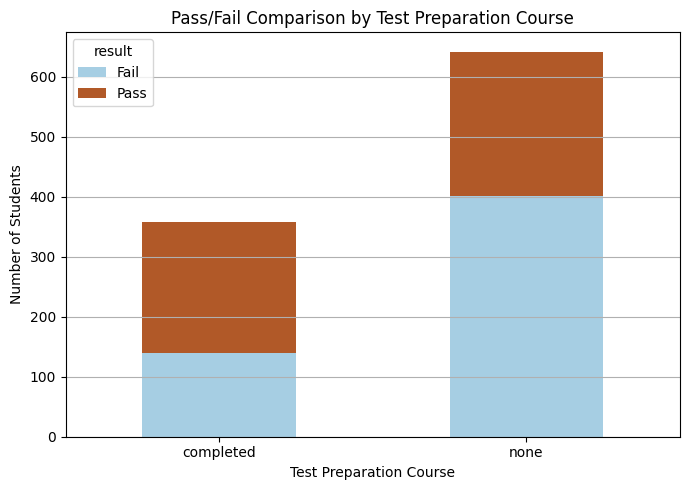

In [42]:
prep_result.plot(
    kind='bar',
    stacked=True,
    colormap='Paired',
    figsize=(7,5),
    title='Pass/Fail Comparison by Test Preparation Course'
)
plt.xlabel("Test Preparation Course")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


calculate pass rates

In [43]:
prep_pass_rate = prep_result.apply(lambda x: x['Pass'] / (x['Pass'] + x['Fail']) * 100, axis=1)
print(prep_pass_rate)


test preparation course
completed    60.893855
none         37.538941
dtype: float64


In [44]:
# 1. Save full cleaned dataset
df.to_csv("full_cleaned_data.csv", index=False)

# 2. Save gender-based pass/fail analysis
gender_result = df.groupby(['gender', 'result']).size().unstack()
gender_result['Pass Rate (%)'] = gender_result['Pass'] / (gender_result['Pass'] + gender_result['Fail']) * 100
gender_result.to_csv("gender_pass_fail_analysis.csv")

# 3. Save parental education-based analysis
parent_result = df.groupby(['parental level of education', 'result']).size().unstack()
parent_result['Pass Rate (%)'] = parent_result['Pass'] / (parent_result['Pass'] + parent_result['Fail']) * 100
parent_result.to_csv("parent_education_analysis.csv")

# 4. Save test preparation course analysis
prep_result = df.groupby(['test preparation course', 'result']).size().unstack()
prep_result['Pass Rate (%)'] = prep_result['Pass'] / (prep_result['Pass'] + prep_result['Fail']) * 100
prep_result.to_csv("test_prep_pass_fail_analysis.csv")
